In [132]:
import numpy as np
import time
import math
import modules as md
import nbodysolver as nbs

#------------------------------------------------------------------------------------------
#Units and conversions:
#------------------------------------------------------------------------------------------
#code units: Rsun, Msun, G=1, ...
c_SI       = 299792458.0        #m/s
M_sun_SI   = 1.989*(10.**30.)   #kg
R_sun_SI   = 695800000.         #m
AU_SI      = 149597871000.      #m 
G_new_SI   = 6.67*(10.**(-11.)) #m**3 kg**(-1) s**(-2)
AU_U       = AU_SI/R_sun_SI                             #from dist AU to code units (U)
kmsec_U    = 1000./np.sqrt(G_new_SI*M_sun_SI/R_sun_SI)  #from vel km/sec to code units (U)
time_U     = np.sqrt((R_sun_SI**3)/(G_new_SI*M_sun_SI)) #from code units(U) to time sec
Rsch_1Msun_unitRsun = ((2.*G_new_SI*(1.*M_sun_SI))/(c_SI**2.))/R_sun_SI

In [133]:
s1 = md.Particle("WD",1,1, 0) #Type, mass, radius, spin
bh2 = md.Particle("BH",2,0,0)


In [134]:
bh2s1 = md.Binary(bh2, s1, 10, 0 ) ##primary, secondary, orbital distance (Rsun), eccentricity 
dtidal = bh2s1.tidalrsec

In [135]:
#Set tides and spin off

In [136]:
#Set it in a circular orbit of the pericenter distance to evaluate the tidal effects at this point

rt35rp = dtidal*3.5
rt47rp = dtidal*4.7
rt10 = dtidal*10.0

bh2s1r3_5c = md.Binary(bh2, s1, rt35rp, 0)

bh2s1r4_7c = md.Binary(bh2, s1, rt47rp, 0)


In [170]:
rt35rp

4.4097236746320565

In [137]:
print(bh2s1r3_5c.tideeffsec)
print(bh2s1r4_7c.tideeffsec)

0.001031114529562515
0.0002361336274147283


In [138]:
print(rt10)

12.599210498948732


# Set up parabolic orbit
We do it by setting an elliptic orbit with eccentricity 0.99999

In [139]:
ecce = 0.99999
mean = 0 #(1./2)*np.pi

runsim = np.array([350000,470000])#Run sim at [3.5,4.7] tidal radius



In [140]:
bh2s1r3_5e = md.Binaryecc(bh2, s1, dtidal*runsim[0], ecce, mean)

bh2s1r4_7e = md.Binaryecc(bh2, s1, dtidal*runsim[1], ecce, mean)

In [141]:
print(bh2s1r3_5e.r)
print(bh2s1r4_7e.r)

[[ 1.46990789 -0.         -0.        ]
 [-2.93981578  0.          0.        ]]
[[ 1.97387631 -0.         -0.        ]
 [-3.94775262  0.          0.        ]]


Check that the pericenter distance matches 

In [142]:
print(np.linalg.norm(bh2s1r3_5e.r[0] - bh2s1r3_5e.r[1]))
print(rt35rp)
print(np.linalg.norm(bh2s1r4_7e.r[0] - bh2s1r4_7e.r[1]))
print(rt47rp)

4.409723674610163
4.4097236746320565
5.921628934476505
5.921628934505904


Run a simulation with an accuracy of 10^-5

In [143]:
NP = 0.7 #Number of periods in code units you want to simulate
tfinal = NP*bh2s1r3_5c.periodct #Final time in code units
Nsteps = int(1000*NP*tfinal) #Fix the first coefficient to change accuracy 
dt = tfinal/(Nsteps-1)  # fixed time step


In [144]:
Nsteps

16460

In [145]:
print(dt)

0.0014286666276846064


In [167]:
rt10**5

317480.21039364

In [169]:
rt35rp**5

1667.4655925268464

In [146]:
r,v = nbs.Hermite4th(bh2,s1, bh2s1r3_5e, Nsteps, dt)

No handles with labels found to put in legend.


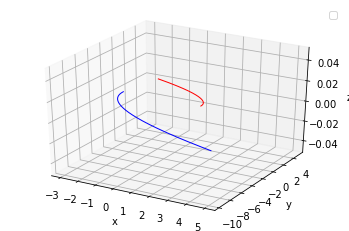

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(r[0][0], r[0][1], r[0][2], 'r', linewidth=1)# Plot the BH orbit
ax.plot(r[1][0], r[1][1], r[1][2], 'b', linewidth=1)# Plot the star orbit
#ax.scatter3D(simulation[0][0][0], simulation[0][0][1], simulation[0][0][2], 'o', c='black') #s=100
#ax.scatter3D(simulation[2][0][0], simulation[2][0][1], simulation[2][0][2], 'o', c='black') #s=10
ax.legend()
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_zticks([])
#ax.set_xlim3d(-1,1)
#ax.set_ylim3d(-1,1)
#ax.set_xlim3d(min(min(posbh1x), min(posbh2x)), max(max(posbh1x), max(posbh2x)))
#ax.set_ylim3d(min(min(posbh1y), min(posbh2y)), max(max(posbh1y), max(posbh2y)))
#ax.set_zlim3d(min(min(posbh1z), min(posbh2z)), max(max(posbh1z), max(posbh2z)))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


#plt.savefig('starbh-withoutspin.eps', format='eps')#, dpi=200

plt.show()

In [148]:
nf = Nsteps -1
print(np.linalg.norm(r[0].T[nf] - r[1].T[nf]))

16.26885506946414


In [149]:
print(rt10)

12.599210498948732


In [150]:
print(nf)

16459


In [151]:
print(2*11677)

23354


In [152]:
nf = 11677
print(np.linalg.norm(r[0].T[nf] - r[1].T[nf]))

12.599326282897968


Obtain the initial conditions from this point
Change the the velocity with a minus sign so it heads to opposit direction

In [153]:
print(r[0].T[nf])
print(-v[0].T[nf])
print(r[1].T[nf])
print(-v[1].T[nf])

[-1.25998694  4.00631334  0.        ]
[ 0.18545503 -0.13608291 -0.        ]
[ 2.51997389 -8.01262667  0.        ]
[-0.37091006  0.27216582 -0.        ]


In [154]:
r35IC = np.array([r[0].T[nf], r[1].T[nf]])
v35IC = np.array([-v[0].T[nf], -v[1].T[nf]])
t35IC = 2*nf*dt #(two times the time that it took the star to get to the IC)

In [155]:
print(r35IC)
print(v35IC)
print(t35IC)

[[-1.25998694  4.00631334  0.        ]
 [ 2.51997389 -8.01262667  0.        ]]
[[ 0.18545503 -0.13608291 -0.        ]
 [-0.37091006  0.27216582 -0.        ]]
33.3650804229463


rp = 4.7rt

In [156]:
NP = 0.7 #Number of periods in code units you want to simulate
tfinal = NP*bh2s1r4_7c.periodct #Final time in code units
Nsteps = int(1000*NP*tfinal) #Fix the first coefficient to change accuracy 
dt = tfinal/(Nsteps-1)  # fixed time step


In [157]:
print(dt)

0.0014286819984148595


In [158]:
r,v = nbs.Hermite4th(bh2,s1, bh2s1r4_7e, Nsteps, dt)

No handles with labels found to put in legend.


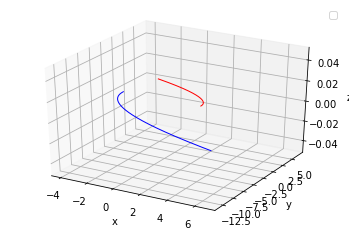

In [159]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(r[0][0], r[0][1], r[0][2], 'r', linewidth=1)# Plot the BH orbit
ax.plot(r[1][0], r[1][1], r[1][2], 'b', linewidth=1)# Plot the star orbit
#ax.scatter3D(simulation[0][0][0], simulation[0][0][1], simulation[0][0][2], 'o', c='black') #s=100
#ax.scatter3D(simulation[2][0][0], simulation[2][0][1], simulation[2][0][2], 'o', c='black') #s=10
ax.legend()
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_zticks([])
#ax.set_xlim3d(-1,1)
#ax.set_ylim3d(-1,1)
#ax.set_xlim3d(min(min(posbh1x), min(posbh2x)), max(max(posbh1x), max(posbh2x)))
#ax.set_ylim3d(min(min(posbh1y), min(posbh2y)), max(max(posbh1y), max(posbh2y)))
#ax.set_zlim3d(min(min(posbh1z), min(posbh2z)), max(max(posbh1z), max(posbh2z)))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


#plt.savefig('starbh-withoutspin.eps', format='eps')#, dpi=200

plt.show()

In [160]:
nf = Nsteps -1
print(np.linalg.norm(r[0].T[nf] - r[1].T[nf]))

21.84674824073899


In [161]:
print(rt10)

12.599210498948732


In [162]:
2*12033

24066

In [163]:
nf = 12033
print(np.linalg.norm(r[0].T[nf] - r[1].T[nf]))

12.599589176917888


In [164]:
r47IC = np.array([r[0].T[nf], r[1].T[nf]])
v47IC = np.array([-v[0].T[nf], -v[1].T[nf]])
t47IC = 2*nf*dt #(two times the time that it took the star to get to the IC)

In [165]:
print(t47IC)

34.382660973852005


Measure tidal effects at 10rt 

In [91]:
bh2s1rt10 = md.Binary(bh2, s1, rt10, 0)
print(bh2s1rt10.tideeffsec)

5.4156068432366235e-06


0.0014286819984148595
